# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [26]:
df
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')
df

,p1,p2,média,evolução
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712
5,4.231065,3.433002,3.832033,-0.798063
6,9.807642,9.837325,9.822484,0.029683
7,6.848297,7.917613,7.382955,1.069316
8,4.809319,5.700025,5.254672,0.890706
9,3.921175,5.676061,4.798618,1.754886


In [27]:
# a) Obtendo a média e a diferença através da multiplicação matricial.

t = np.array([[.5,.5],[-1,1]])

np.matmul(t, df[['p1', 'p2']].to_numpy().transpose())


array([[ 7.45405986,  3.98046502,  1.62147187,  4.99375359,  8.06654581,
         3.83203323,  9.8224836 ,  7.38295537,  5.25467221,  4.79861827,
         4.17960223,  7.82519341,  3.99936809,  0.9942103 ,  4.13757855,
         6.71682133,  2.53356683,  2.15813583,  5.33825878,  5.20172984,
         5.74485901,  8.59407998,  7.47877281,  5.69465761,  7.80553585,
         2.68098762,  2.55633638,  2.80249585,  2.73545744,  6.24674645,
         0.50229104,  3.53403035,  4.93624632,  4.59241648,  5.08877915,
         3.52626632,  4.106134  ,  8.39094043,  9.07536919,  4.41210519,
         7.2830862 ,  1.23840457,  3.74795759,  3.5145861 ,  8.75360914,
         3.09348462,  4.66283726,  9.92779893,  4.65256724,  5.44720949],
       [ 0.97873601,  2.23814334, -1.29408532, -1.03878821,  1.74371223,
        -0.79806274,  0.02968323,  1.06931597,  0.89070639,  1.75488618,
         1.49564414,  1.06939267, -0.77270871,  0.79486267,  0.31427199,
        -1.32626546,  1.41729905,  0.80723653,  0.

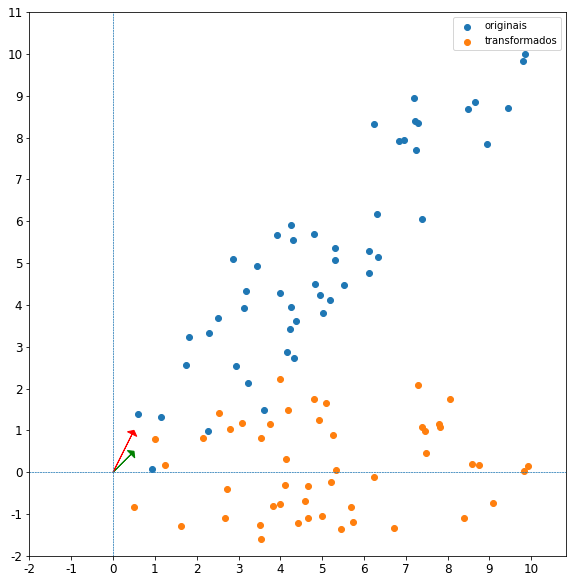

In [28]:
# plotando
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

xmin = -2
xmax = df.p1.max()*1.1
ymin = -2
ymax = df.p2.max()*1.1

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize ='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize = 'large')

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

ax.arrow(0,0, t[0,0], t[0,1]
         , head_width=.25
         , head_length=.1
         , fc='g', ec='g',
         length_includes_head=True)

ax.arrow(0,0,t[0,1], t[1,1]
        , head_width =.25
        , head_length=.1
        , fc = 'r', ec='r',
        length_includes_head=True)

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

df_rot = np.matmul(t, df[['p1', 'p2']].to_numpy().transpose())

plt.scatter(df['p1'], df['p2'], label = 'originais')
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')
plt.legend()



In [36]:
# b) cálcule a correlação entre os dados p1 e p2

df1 = df[['p1','p2']]
df1.corr()


,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [39]:
# c) cálculo da correlação entre a média e a evolução (diferença)

df2 = df[['média', 'evolução']]
df2.corr()

,média,evolução
média,1.000000,0.133474
evolução,0.133474,1.000000


In [ ]:
# d) comentário das correlações observadas

Observa-se que o coeficiente de correlação entre as provas 1 (p1) e provas 2 (p2) foi de 0,895737. Na medida em que o coeficiente de correlação é acima de zero e mais próximo de 1, é possível afirmar que existe uma correlação entre os pontos, sendo esta correlação positiva e forte na medida em que se aproxima do número 1. Cabe destacar que o coeficiente de correlação igual a 1, demonstra que os pontos têm uma correlação perfeita, ao ponto de se traçar uma reta que posse sobre todos os pontos.

Com relação ao coeficiente de correlação obtido entre a média e a diferença, denota-se que este coeficiente está mais próximo de zero (0,133474). O que demonstra que a correlação é fraca, contudo positiva. É fraca porque está mais próximo do zero. O coeficiente de correlação igua a zero demonstra que o pontos não guardam nenhuma correlação entre si, ou seja, os pontos estão todos dispersos no eixo x e y, sem guardar qualquer correlação.

A título informativo a fórmula do coeficiente de correlação é:

## **$$r_{x y} = \frac{n.\sum_{xi yi} - \sum_{xi}.\sum_{yi}}{\sqrt{n.\sum_{xi²} - (\sum_{xi})^2}.\sqrt{n.\sum_{yi²} - (\sum_{yi})^2}.}$$** ##

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

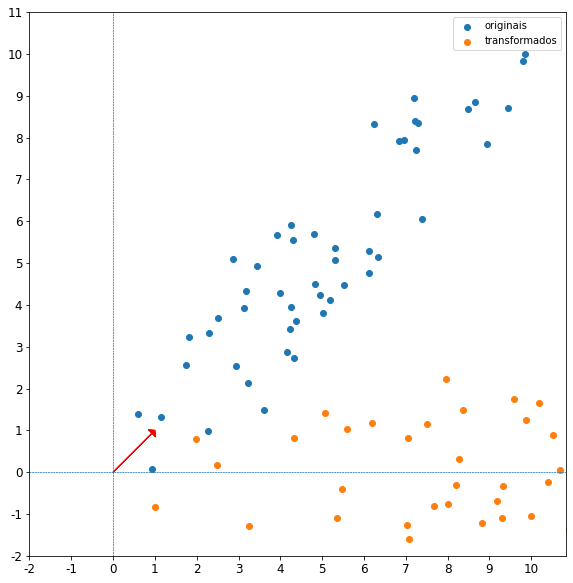

In [50]:
s = np.array([[1,1],[-1,1]])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

xmin = -2
xmax = df.p1.max()*1.1
ymin = -2
ymax = df.p2.max()*1.1

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize ='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize = 'large')

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

ax.arrow(0,0, s[0,0], s[0,1]
         , head_width=.25
         , head_length=.1
         , fc='g', ec='g',
         length_includes_head=True)

ax.arrow(0,0,s[0,1], s[1,1]
        , head_width =.25
        , head_length=.1
        , fc = 'r', ec='r',
        length_includes_head=True)

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

df_rot = np.matmul(s, df[['p1', 'p2']].to_numpy().transpose())

plt.scatter(df['p1'], df['p2'], label = 'originais')
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')
plt.legend()



In [51]:
df_rot

array([[14.90811972,  7.96093004,  3.24294375,  9.98750717, 16.13309162,
         7.66406647, 19.6449672 , 14.76591074, 10.50934442,  9.59723655,
         8.35920446, 15.65038682,  7.99873618,  1.9884206 ,  8.2751571 ,
        13.43364265,  5.06713366,  4.31627166, 10.67651756, 10.40345968,
        11.48971803, 17.18815996, 14.95754562, 11.38931523, 15.6110717 ,
         5.36197523,  5.11267276,  5.60499171,  5.47091489, 12.49349289,
         1.00458208,  7.06806069,  9.87249264,  9.18483297, 10.17755829,
         7.05253265,  8.21226799, 16.78188086, 18.15073838,  8.82421039,
        14.5661724 ,  2.47680913,  7.49591518,  7.02917219, 17.50721829,
         6.18696925,  9.32567452, 19.85559786,  9.30513447, 10.89441897],
       [ 0.97873601,  2.23814334, -1.29408532, -1.03878821,  1.74371223,
        -0.79806274,  0.02968323,  1.06931597,  0.89070639,  1.75488618,
         1.49564414,  1.06939267, -0.77270871,  0.79486267,  0.31427199,
        -1.32626546,  1.41729905,  0.80723653,  0.

In [52]:
df1.corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [53]:
df['soma'] = df['p1']+df['p2']
df3 = df[['soma', 'evolução']]
df3.corr()

,soma,evolução
soma,1.000000,0.133474
evolução,0.133474,1.000000


Realizando a transformação, desta vez de modo a obter a soma e a diferença entre p1 e p2, verifica-se que o coeficiente de correlação ficou idêntico àquele encontrado entre a média e a diferenças (0,133474). Trata-se de uma correlação positiva porém fraca. Note-se que os pontos estão mais próximo do eixo x e por todo sua extensão, devido o y, sendo a diferença entre a p2 e p1, variar entre 2 e -2.